# Computer Vision 1

## CLASE 3

## Referencias

- [Cheatsheet de Latex](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)

## Comentarios sobre el estado del documento



## Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
 
import numpy as np

import cv2 as cv

%matplotlib inline

## Enunciado

Para la imagen suministrada “eyes” (por ninguna razón en especial, con heterocromía), implementar un algoritmo que:

1. Encuentre la posición de los iris en cada par de ojos y mida su distancia en píxeles.
2. Encuentre la posición de las pupilas en cada par de ojos y mida su distancia en píxeles.

In [27]:
images_list = ['./Imagenes/' +img for img in os.listdir(path='./Imagenes')]
print(images_list)

EYES_PATH = images_list[1]

['./Imagenes/.ipynb_checkpoints', './Imagenes/C4_eyes.jpg', './Imagenes/C4_Foto.jpg', './Imagenes/C4_guason.png', './Imagenes/C4_justiceleague.jpg', './Imagenes/C4_origami.jpg', './Imagenes/C4_Tablero.png', './Imagenes/C4_tapitas.jpg', './Imagenes/CoordCrom_1.png', './Imagenes/CoordCrom_2.png', './Imagenes/CoordCrom_3.png', './Imagenes/metalgrid.jpg', './Imagenes/tela2.jpg', './Imagenes/test_blue.png', './Imagenes/test_green.png', './Imagenes/test_red.png', './Imagenes/WhatsApp Image 2020-09-15 at 19.16.38.jpeg', './Imagenes/WP_B.png', './Imagenes/WP_O.png', './Imagenes/WP_R.png']


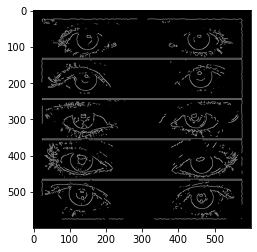

In [46]:
img_eyes = cv.imread(EYES_PATH)
img_eyes_color = cv.imread(EYES_PATH)
img_eyes = cv.cvtColor(img_eyes, cv.COLOR_BGR2GRAY)


# paso un filtro gausiano para suavizar los bordes de la imagen
img_eyes = cv.GaussianBlur(img_eyes, (3,3), cv.BORDER_DEFAULT )

edges_eyes = cv.Canny(img_eyes,150,160,apertureSize = 3)
plt.imshow(edges_eyes, cmap='gray')
plt.show()

circles = cv.HoughCircles(edges_eyes,cv.HOUGH_GRADIENT,1,minDist=90,param1=30,param2=20,minRadius=10, maxRadius=35)

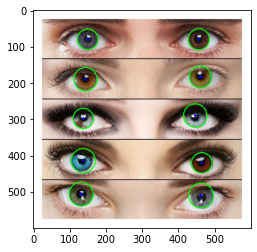

Las distancias entre los iris son 
 [167.6305461424021, 185.35371590556258, 171.44095193389472, 201.93068117549646, 208.2786594925174]


In [47]:
# Deteccion de iris en la imagen de ojos heterocromáticos

img_out = img_eyes_color.copy()
img_out = cv.cvtColor(img_out, cv.COLOR_BGR2RGB)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(img_out)
plt.show()

# Ordenar círculos para hacer cálculo de distancias
idx_sort = np.argsort(circles[:,:,1])
ordered_eyes = circles[:,idx_sort,:2].reshape(-1,2)

# Algoritmo de detección de distancias

distances = []

for i, eye in enumerate(ordered_eyes):
    if i % 2 == 0:
        distances.append(np.sum((ordered_eyes[i] - ordered_eyes[i+1])**2)**0.5)  

print(f'Las distancias entre los iris son \n {distances}')

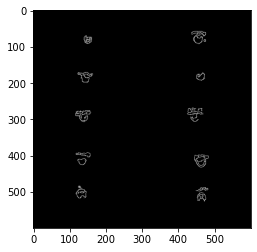

array([[[133.5, 505.5,  12.2],
        [461.5, 415.5,  12.2],
        [447.5, 292.5,  12.2],
        [463.5, 516.5,  12.2],
        [144.5, 186.5,  11.1],
        [150.5,  81.5,   9.6],
        [140.5, 291.5,  12.2],
        [457.5,  78.5,  13.4],
        [459.5, 181.5,  11. ],
        [134.5, 414.5,   9.6]]], dtype=float32)

In [401]:
img_eyes = cv.imread(EYES_PATH)
img_eyes_color = cv.imread(EYES_PATH)
img_eyes = cv.cvtColor(img_eyes, cv.COLOR_BGR2GRAY)
    
# Como las pupilas son puntos negros en la imagen, le paso un filtro binario de bajos
img_pupilas = (img_eyes < 31) * img_eyes * 2


# Creo una máscara alrededor de los ojos.. El delineado de las pestañas agrega mucho ruido
mask = np.zeros(img_eyes.shape)

window = 20

for eye in ordered_eyes:
    mask[eye[1]-window:eye[1]+window,eye[0]-window:eye[0]+window] = 1
        
img_pupilas = (img_pupilas * mask).astype(np.uint8)

# paso un filtro gausiano para suavizar los bordes de la imagen
img_pupilas = cv.GaussianBlur(img_pupilas, (5, 5), cv.BORDER_DEFAULT )

edges_eyes = cv.Canny(img_pupilas, 20, 40,apertureSize =3)
plt.imshow(edges_eyes, cmap='gray')
plt.show()

circles = cv.HoughCircles(edges_eyes,cv.HOUGH_GRADIENT,1,minDist=65,param1=10,param2=10,minRadius=3, maxRadius=14)
circles

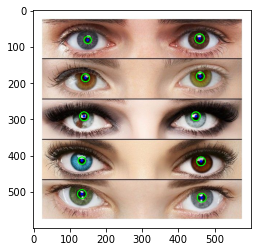

Las distancias entre las pupilas son 
 [171.30090484291085, 185.29975715040752, 171.25419702886117, 205.06584308460538, 208.4802148886076]


In [403]:
# Deteccion de iris en la imagen de ojos heterocromáticos

img_out = img_eyes_color.copy()
img_out = cv.cvtColor(img_out, cv.COLOR_BGR2RGB)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(img_out)
plt.show()

# Ordenar círculos para hacer cálculo de distancias
idx_sort = np.argsort(circles[:,:,1])
ordered_eyes = circles[:,idx_sort,:2].reshape(-1,2)

# Algoritmo de detección de distancias

distances_pupils = []

for i, eye in enumerate(ordered_eyes):
    if i % 2 == 0:
        distances_pupils.append(np.sum((ordered_eyes[i] - ordered_eyes[i+1])**2)**0.5)  

print(f'Las distancias entre las pupilas son \n {distances}')

In [406]:
print(f'La diferencia entre ambas distancias es: {np.array(distances) - np.array(distances_pupils)}')

La diferencia entre ambas distancias es: [0. 0. 0. 0. 0.]
